# Лабораторная работа №3

Было выбрано 3 метода минимизации:
- Метод Нестерова
- Метод тяжёлого шарика
- Модифицированный метод Ньютона

In [3]:
import numpy as np
import pandas as pd

# Функция Розенброка
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# вычисление градиента функции Розенброка
def grad_rosenbrock(x):
    dx = (-2 * (1 - x[0])   # производная от (1 - x)^2 по x 
          - 400 * x[0] * (x[1] - x[0]**2))
    
    dy = 200 * (x[1] - x[0]**2)
    return np.array([dx, dy])

# матрица вторых производных (для мод. метода Ньютона)
# так получаем полную информацию о кривизне функции в точке
def hessian_rosenbrock(x):
    dxx = 2 - 400 * (x[1] - x[0]**2) + 800 * x[0]**2 
    dxy = -400 * x[0]
    dyy = 200
    return np.array([[dxx, dxy], [dxy, dyy]])

# Генерация начальной точки
rng = np.random.default_rng(42)
x0 = rng.uniform(-5, 5, size=2) # равномерное распределение на отрезке 

# Параметры остановки и максимум итераций
tol = 1e-3
max_iter = 100000

results = []

# 1) Метод тяжёлого шарика
f_vals_hb = []  # для построения графиков
alpha_hb = 1e-4
beta_hb = 0.9
x_prev = x0.copy()
x_curr = x0.copy()
for i in range(1, max_iter + 1):
    f_vals_hb.append(rosenbrock(x_curr))    
    grad = grad_rosenbrock(x_curr)
    x_new = x_curr - alpha_hb * grad + beta_hb * (x_curr - x_prev)
    x_prev, x_curr = x_curr, x_new
    if rosenbrock(x_curr) <= tol:
        results.append(['Тяжёлый шарик', i, x_curr.copy(), rosenbrock(x_curr)])
        f_vals_hb.append(rosenbrock(x_curr))
        break

# 2) Ускоренный градиент Нестерова
f_vals_nes = []
alpha_nes = 1e-4
beta_nes = 0.9
x_prev = x0.copy()
x_curr = x0.copy()
for i in range(1, max_iter + 1):
    f_vals_nes.append(rosenbrock(x_curr))
    y = x_curr + beta_nes * (x_curr - x_prev)
    grad = grad_rosenbrock(y)
    x_new = y - alpha_nes * grad
    x_prev, x_curr = x_curr, x_new
    if rosenbrock(x_curr) <= tol:
        results.append(["Уск. градиент Нестерова", i, x_curr.copy(), rosenbrock(x_curr)])
        f_vals_nes.append(rosenbrock(x_curr))
        break

# 3) Модифицированный метод Ньютона
f_vals_mn = []
H0 = hessian_rosenbrock(x0)
H0_inv = np.linalg.inv(H0)
x_curr = x0.copy()
for i in range(1, max_iter + 1):
    f_vals_mn.append(rosenbrock(x_curr)) 
    grad = grad_rosenbrock(x_curr)
    x_new = x_curr - H0_inv @ grad
    x_curr = x_new
    if rosenbrock(x_curr) <= tol:
        results.append(['Мод. метод Ньютона', i, x_curr.copy(), rosenbrock(x_curr)])
        f_vals_mn.append(rosenbrock(x_curr))        
        break

df = pd.DataFrame(results, columns=['Метод', 'Итераций', 'x_final', 'f_final'])
df 

,Метод,Итераций,x_final,f_final
0,Тяжёлый шарик,8672,"[1.0315935350598946, 1.0643092625260504]",0.001000
1,Уск. градиент Нестерова,7581,"[0.968416105561123, 0.9377009436798185]",0.000999
2,Мод. метод Ньютона,9588,"[1.031613886417307, 1.0641885120098167]",0.001000


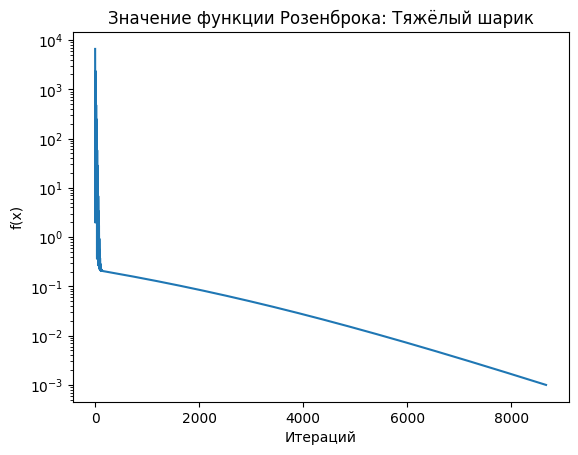

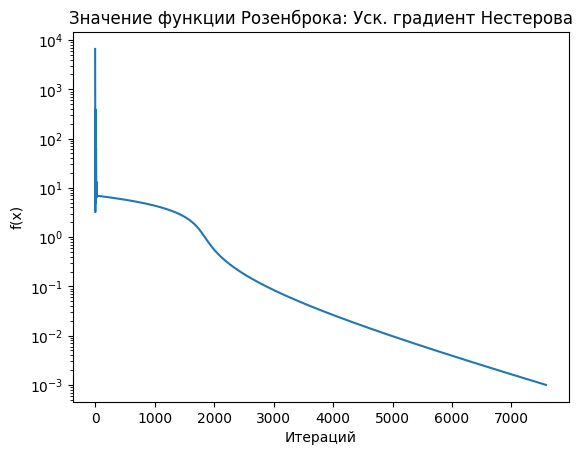

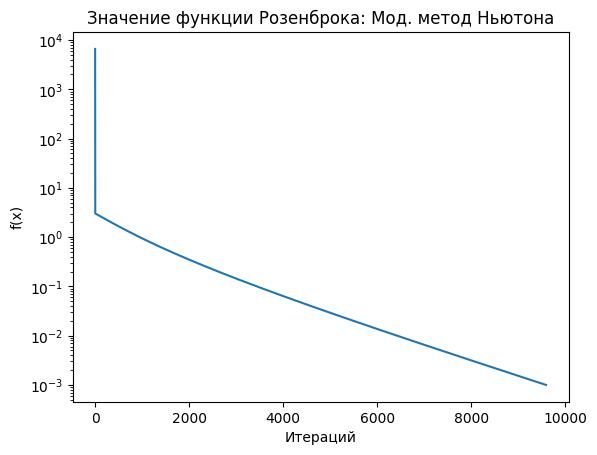

In [6]:
import matplotlib.pyplot as plt

for values, name in [(f_vals_hb, 'Тяжёлый шарик'),
                     (f_vals_nes, "Уск. градиент Нестерова"),
                     (f_vals_mn, 'Мод. метод Ньютона')]:
    plt.figure()
    plt.plot(values)
    plt.xlabel('Итераций')
    plt.ylabel('f(x)')
    plt.title(f'Значение функции Розенброка: {name}')
    plt.yscale('log')
    plt.show()

Метод Ньютона мгновенно срезал значение функции на нескольких первых итерациях, но дальше терял преимущество и в итоге требовал примерно столько же шагов, сколько и градиентные схемы. Тяжёлый шарик показал заметные осцилляции на старте и относительно медленный монотонный спад с большим числом итераций. А ускоренный метод Нестерова объединил устойчивость и скорость, сведя колебания к минимуму и достигнув заданной точности быстрее всех.